In [28]:
import pandas as pd
import glob
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_ds_tona_ammonia = pd.read_parquet('datasets\Hilden Brook\HILDEN BROOK_DS HILDEN GRANGE_E_202110-AMMONIUM-900.parquet') 

In [30]:
df_us_glen_ammonia = pd.read_parquet('datasets\Hilden Brook\HILDEN BROOK_US GLENDALE NURSERY_E_202310-CONDUCTIVITY-900.parquet')

In [31]:
ammonia_df_dict = {}
folder_path = 'datasets/Hilden Brook'
for filename in glob.glob(f"{folder_path}/*AMMONIUM*.parquet"):
    key = filename.split("_")[1]  # Extract the part between the first and second underscores
    df = pd.read_parquet(filename)
    df.rename(columns={'value':key},inplace=True)
    df = df.set_index('dateTime')
    ammonia_df_dict[key] = df

In [32]:
#ammonia_df_2023.plot(x='dateTime')

In [33]:
ton_angels_dict = {}
folder_path = 'datasets/Hilden Brook'
for filename in glob.glob(f"{folder_path}/*ANGELS*.parquet"):
    key = filename.split("-")[1]  # between dashes
    df = pd.read_parquet(filename)
    df['dateTime'] = pd.to_datetime(df['dateTime'])
    df.rename(columns={'value':key},inplace=True)
    ton_angels_dict[key] = df

In [34]:
ton_angels_df = None
i = 0
for key, df in ton_angels_dict.items():
    if ton_angels_df is None:
        ton_angels_df = df
    else:
        cols_to_use = ton_angels_df.columns.difference(df.columns)
        ton_angels_df = pd.merge(ton_angels_df, df, on='dateTime',suffixes=(f"_{i}", f"_{99-i}"))
        i+=1

In [35]:
ton_angels_df = pd.concat(ton_angels_dict.values(), ignore_index=True, join='outer')
ton_angels_df = ton_angels_df.set_index('dateTime')
# ton_angels_df = ton_angels_df.fillna(method = 'ffill')
# ton_angels_df = ton_angels_df.fillna(method = 'bfill')




In [36]:
fig = px.line(ton_angels_df,y=['PH','AMMONIUM','CONDUCTIVITY','TURBIDITY','DISSOLVED OXYGEN'])
fig.show()



c:\Anaconda3\envs\sapphire\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



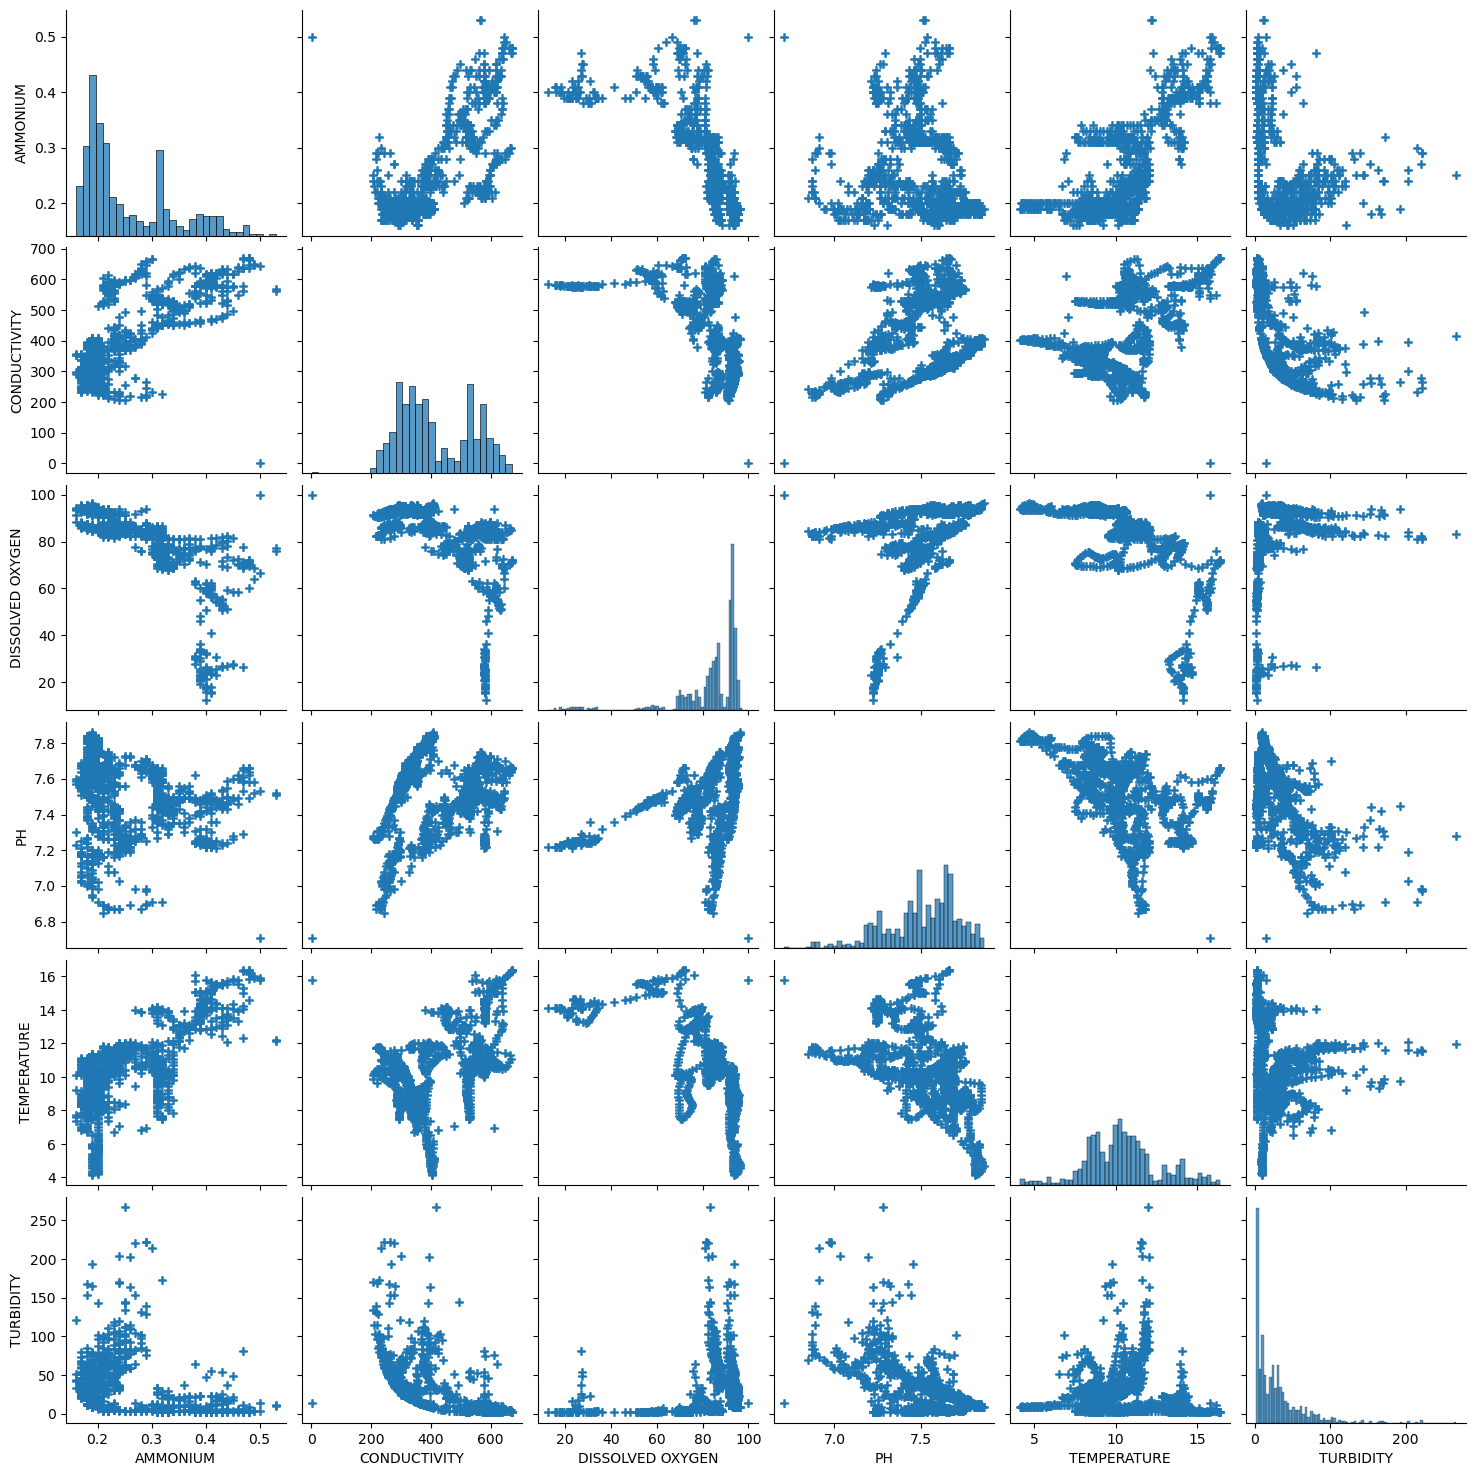

In [37]:
y_variables = ['PH', 'AMMONIUM', 'CONDUCTIVITY', 'TURBIDITY', 'DISSOLVED OXYGEN']
sns.pairplot(ton_angels_df,  kind='scatter',plot_kws=dict(marker="+", linewidth=1))

plt.show()

c:\Anaconda3\envs\sapphire\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



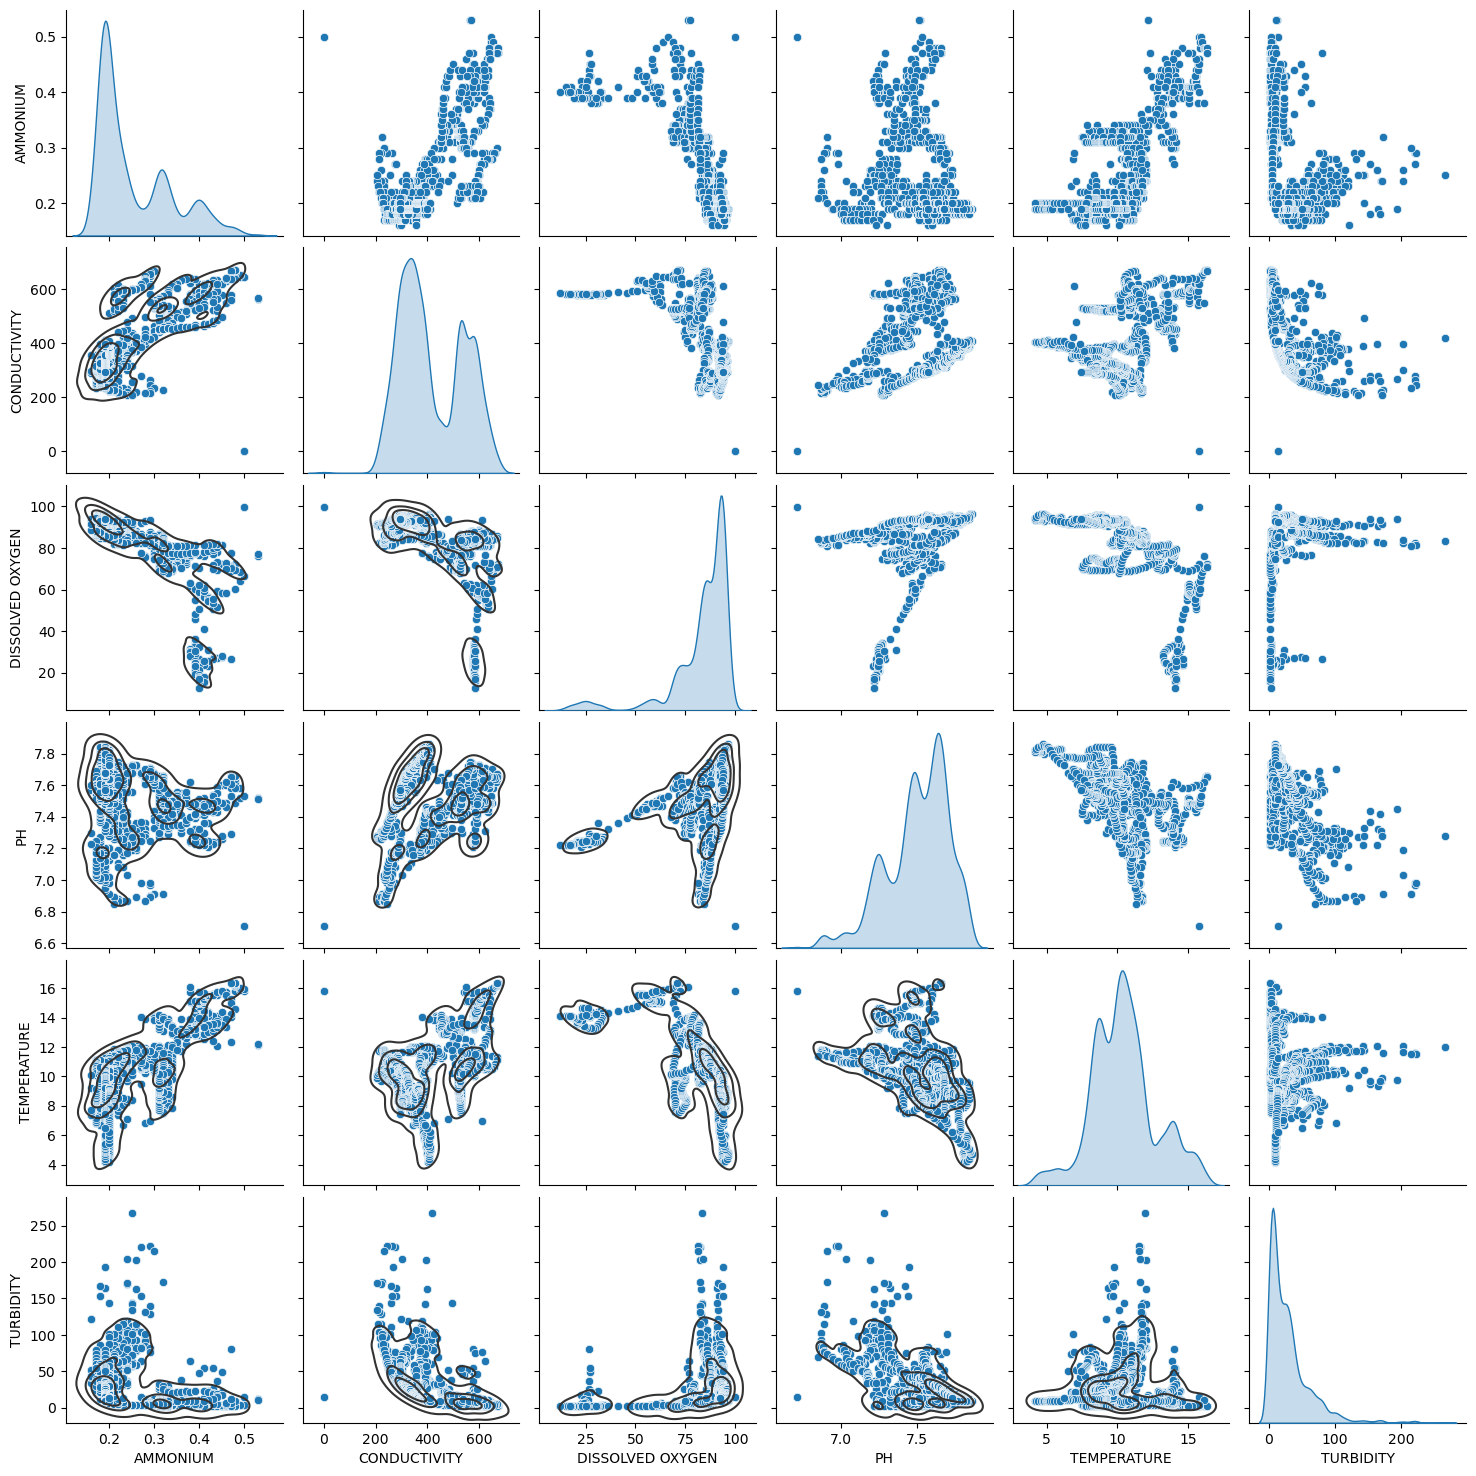

In [38]:
g = sns.pairplot(ton_angels_df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [39]:
df_rain_kilnwood = pd.read_parquet("datasets\Hilden Brook\Kiln Wood-rainfall-900.parquet")
df_rain_kilnwood['dateTime'] = pd.to_datetime(df_rain_kilnwood['dateTime'])
df_rain_kilnwood = df_rain_kilnwood.set_index('dateTime')
isbetweendates = df_rain_kilnwood.index.to_series().between('2023-01-01', '2025-01-10')

df_rain_kilnwood = df_rain_kilnwood[isbetweendates]


In [40]:
fig = px.line(df_rain_kilnwood, y='value')

fig

In [44]:
fig = px.line(ton_angels_df,x=ton_angels_df.index, y=['PH','AMMONIUM','CONDUCTIVITY','TURBIDITY','DISSOLVED OXYGEN'])
fig.show()